# 3b. Fitting carbonate and SO$_2$ peaks
- This notebook shows how to fit secondary peaks, such as carbonate and S-rich phases in vapour bubbles and fluid inclusions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
from tqdm import tqdm
pf.__version__

'1.0.0'

In [2]:
# Here, we are loading in the settings files from Step1. If all you want to do is find secondary phases, paste that code here
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

In [3]:
exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Spec', 'CRR', 'secphase']
Diad_Files=pf.get_files(path=spectra_path, file_ext=spectra_file_ext, exclude_str=exclude_str)
print(Diad_Files)
File_df=pd.DataFrame(data={'filename': Diad_Files})

['02 FG04_A1_4_start.txt', '03 M58_c26_a1_FIA_crazySO2.txt', '05 M58_c25_a1_FIA.txt', '06 M58_c1_a1_FIA.txt', '07 M58_c1_a2_FIB.txt', '09 M58_c2_a1_FIA.txt', '10 M58_c3_a1_FIA.txt', '11 M58_c4_a1_FIA.txt', '13 M58_c6_a1_FIB.txt', '14 M58_c7_a1_FIA.txt', '15 M58_c9_a1_FIA.txt', '17 M58_c10_a1_FIA.txt', '18 M58_c11_a1_FIA.txt', '19 M58_c12_a1_FIA.txt', '21 M58_c13_a1_FIA.txt', '22 M58_c13_a2_FIB.txt', '23 M58_c13_a2_FIC.txt', '24 M58_c14_a1_FIA.txt', '25 M58_c14_a1_FIB.txt', '27 M58_c16_a1_FIA.txt', '28 M58_c16_a1_FIB.txt', '29 M58_c17_a1_FIA.txt', '30 M58_c19_a1_FIA.txt', '32 M58_c20_a1_FIA.txt', '33 M58_c23_a1_FIA.txt', '34 M58_c24_a1_FIA.txt', '35 FG04_A1_4_end.txt']


## Plot spectra in a given region of space to examine secondary peaks or not

### You'll need to tweak the peak parameters to find them
- height = minimum height a peak should have to be identified
- threshold = required vertical distance between a peak and its neighbours
- distance = required horizontal distance bewteen neighbouring peaks. 
- prominence = required prominence of peaks
- width = width of peaks


## Example 1 - Using Scipy find peaks to look for SO2

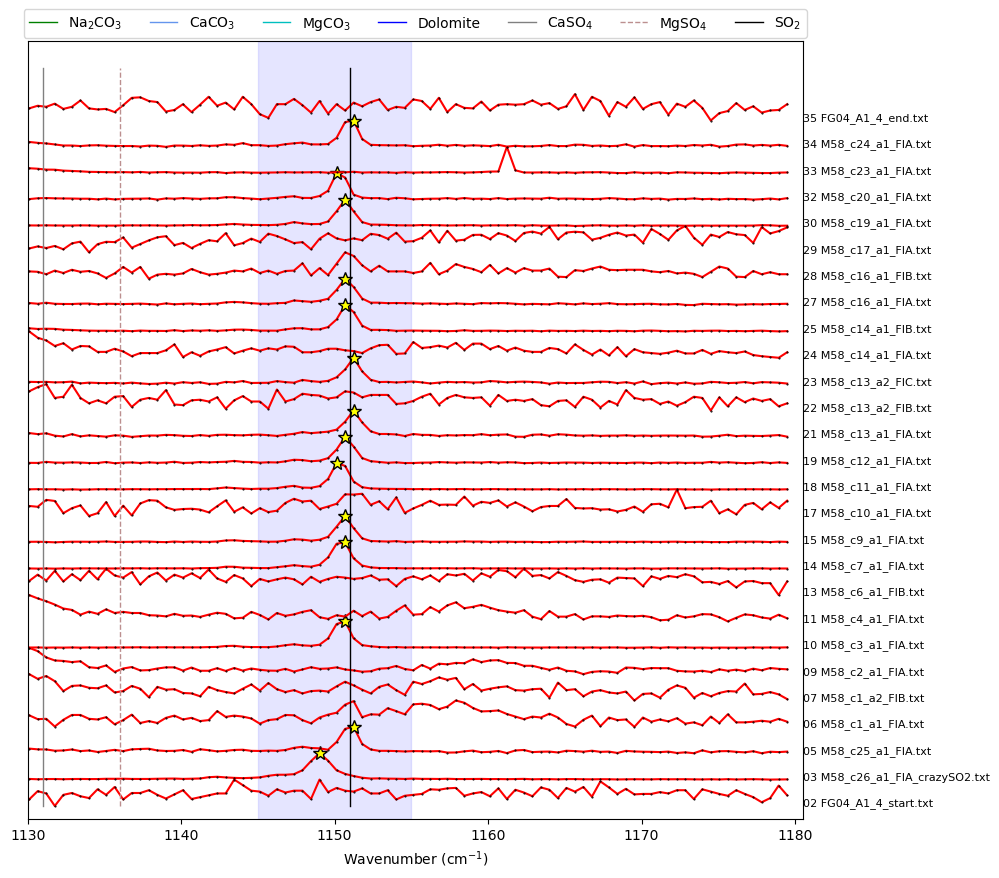

In [4]:
prominence_SO2=20
height_SO2=20
width_SO2=1
threshold_SO2=1

SO2_peaks_scipy, x_data_scipy, y_data_scipy, fig_scipy=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
filetype=spectra_filetype, find_peaks_filter=True,  
xlim_peaks=[1145, 1155], xlim_plot=[1130, 1180], yscale=0.3,
prominence=prominence_SO2, height=height_SO2, width=width_SO2, threshold=threshold_SO2)

SO2_peaks=SO2_peaks_scipy

In [5]:
SO2_peaks

,pos,height,prom,file_names
0,NaN,NaN,NaN,02 FG04_A1_4_start.txt
1,1149.012212,1139.00,433.333343,03 M58_c26_a1_FIA_crazySO2.txt
2,1151.234085,723.75,48.250000,05 M58_c25_a1_FIA.txt
3,NaN,NaN,NaN,06 M58_c1_a1_FIA.txt
4,NaN,NaN,NaN,07 M58_c1_a2_FIB.txt
5,NaN,NaN,NaN,09 M58_c2_a1_FIA.txt
6,1150.678702,1160.50,476.375000,10 M58_c3_a1_FIA.txt
7,NaN,NaN,NaN,11 M58_c4_a1_FIA.txt
8,NaN,NaN,NaN,13 M58_c6_a1_FIB.txt
9,1150.678702,1165.50,475.500000,14 M58_c7_a1_FIA.txt


### Now filter out ones with no peaks, or low prominence before we loop through them

In [6]:
# Remove the ones where it didnt find SO2
SO2_notNa=np.isnan(SO2_peaks['pos'])
# Remove ones with a prominence less than this. 
prom_filt=10
SO2_filter=((SO2_peaks['prom']>10))&(~SO2_notNa)
print('Number kept with this filter:')
print(sum(SO2_filter))
print('Number discarded:')
print(sum(~SO2_filter&(~SO2_notNa)))
filenames_SO2=list(File_df['filename'].loc[SO2_filter])
print('filenames with SO2:')
print(filenames_SO2)

Number kept with this filter:
14
Number discarded:
0
filenames with SO2:
['03 M58_c26_a1_FIA_crazySO2.txt', '05 M58_c25_a1_FIA.txt', '10 M58_c3_a1_FIA.txt', '14 M58_c7_a1_FIA.txt', '15 M58_c9_a1_FIA.txt', '18 M58_c11_a1_FIA.txt', '19 M58_c12_a1_FIA.txt', '21 M58_c13_a1_FIA.txt', '23 M58_c13_a2_FIC.txt', '25 M58_c14_a1_FIB.txt', '27 M58_c16_a1_FIA.txt', '30 M58_c19_a1_FIA.txt', '32 M58_c20_a1_FIA.txt', '34 M58_c24_a1_FIA.txt']


### Choose a filename to test peak fits

In [7]:
if sum(SO2_filter)>0:
    filename=filenames_SO2[0]

### Set up configuration file for S peak fitting
- Here, we are using a spline to quantify the area down to the 92% of the peak height (int_cut_of=0.08), there are differen options you can use for this

generic_peak_config(name='SO2', lower_bck=[1110, 1130], upper_bck=[1190, 1200], model_name='Spline', x_range_bck=20, N_poly_carb_bck=1, amplitude=1000, cent=1150, outlier_sigma=12, distance=10, prominence=5, width=6, threshold=0.1, height=100, exclude_range=None, return_other_params=False, N_peaks=1, int_cut_off=0.05)


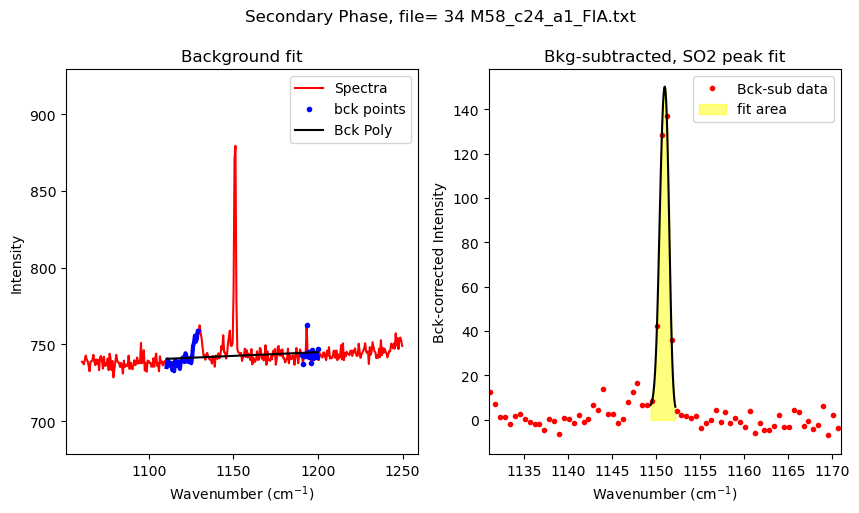

In [21]:
if sum(SO2_filter)>0:
    SO2_peak_config=pf.generic_peak_config(name='SO2', lower_bck=[1110, 1130],
    upper_bck=[1190, 1200], cent=1150, x_range_bck=20, N_peaks=1,   model_name='Spline', int_cut_off=0.05)
    print(SO2_peak_config)

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
    path=spectra_path, filename=filename, filetype=spectra_filetype, 
     plot_figure=True)

## Now lets loop through files

100%|██████████| 14/14 [00:03<00:00,  4.08it/s]


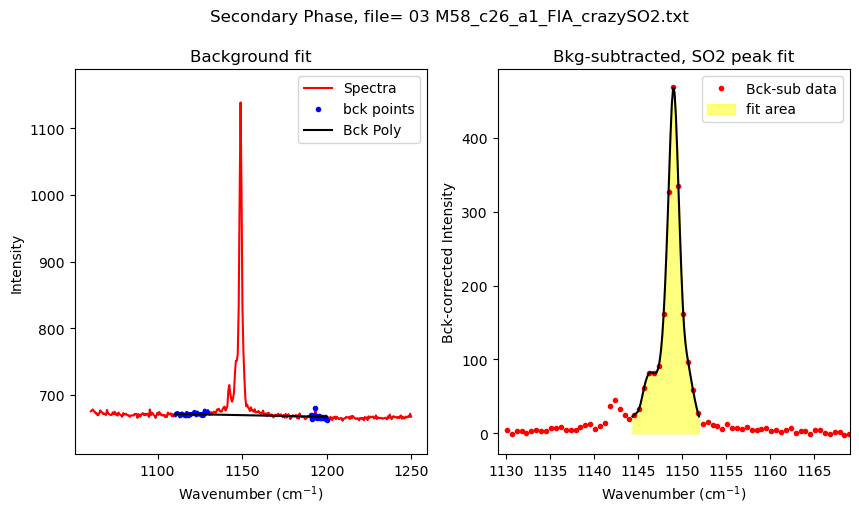

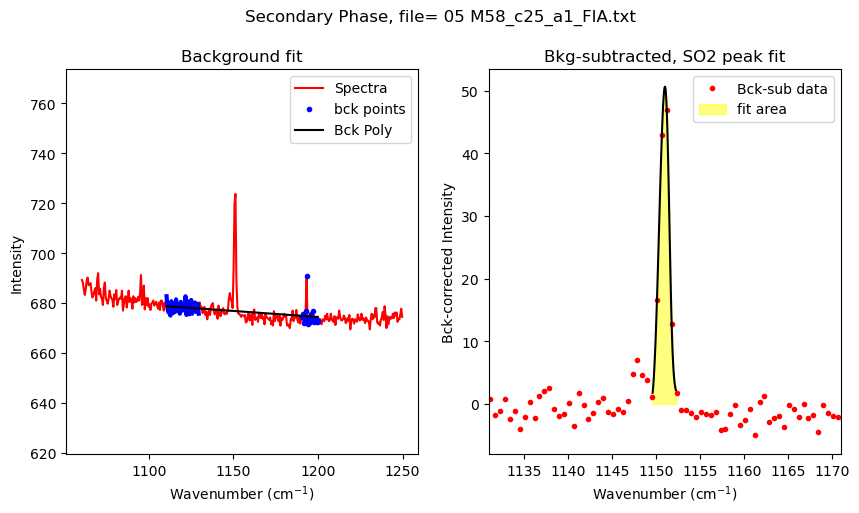

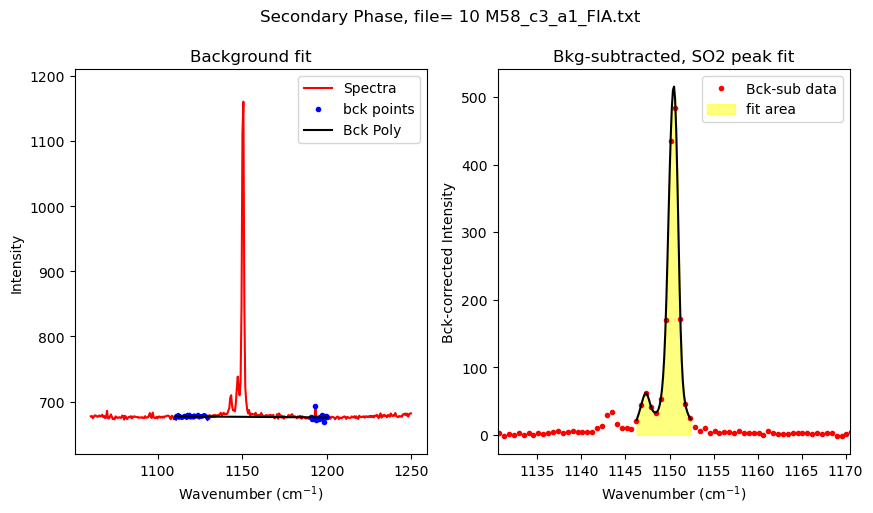

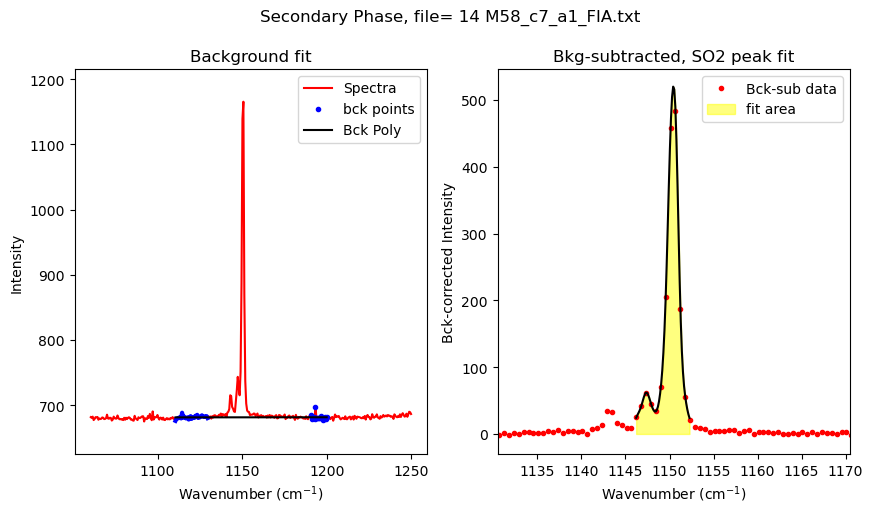

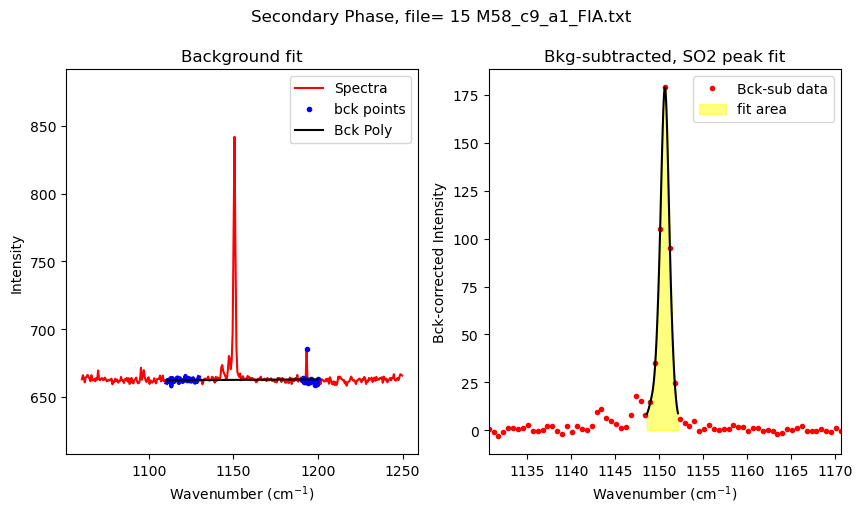

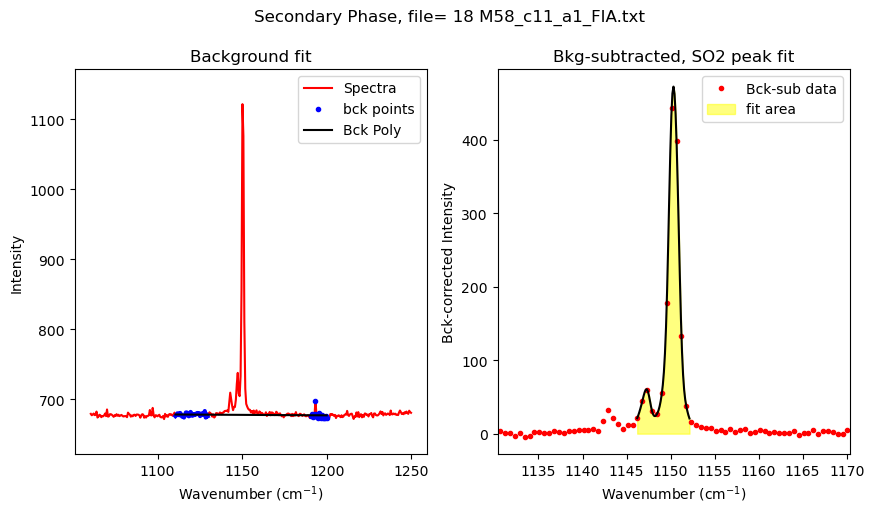

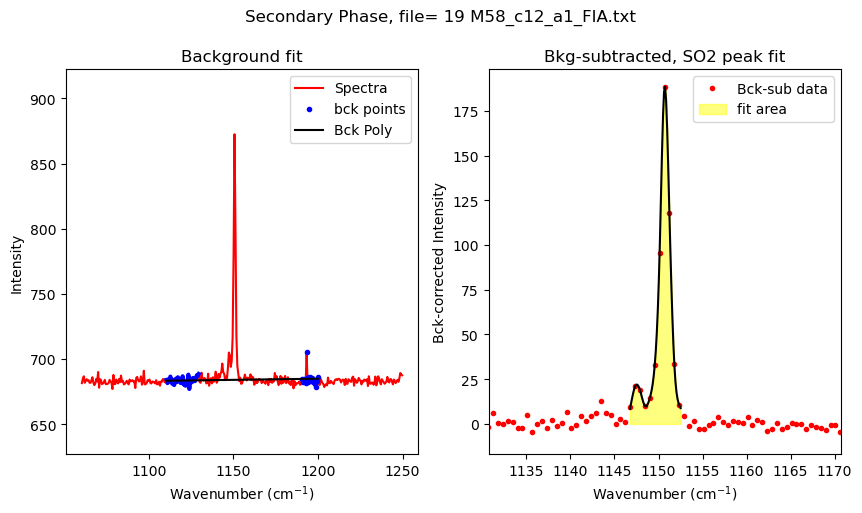

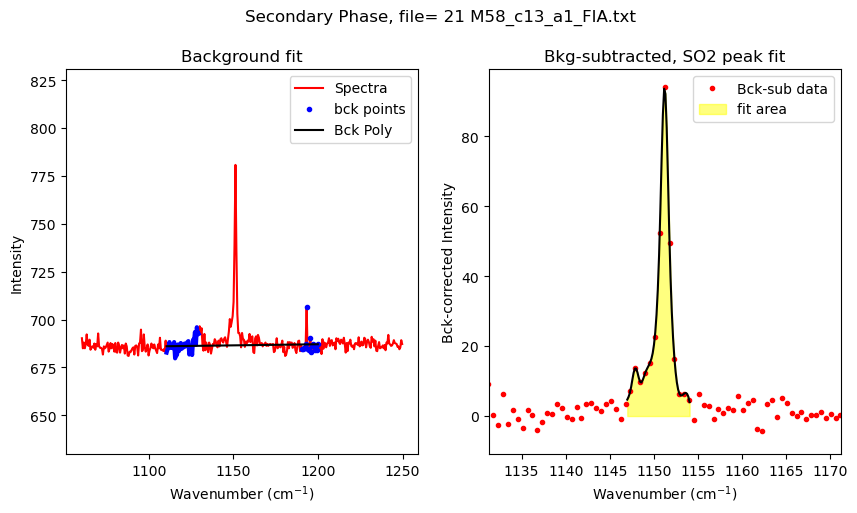

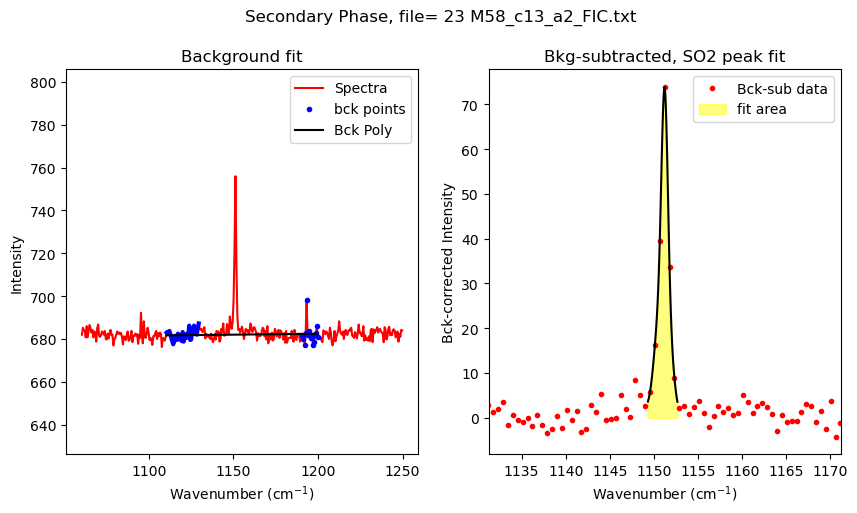

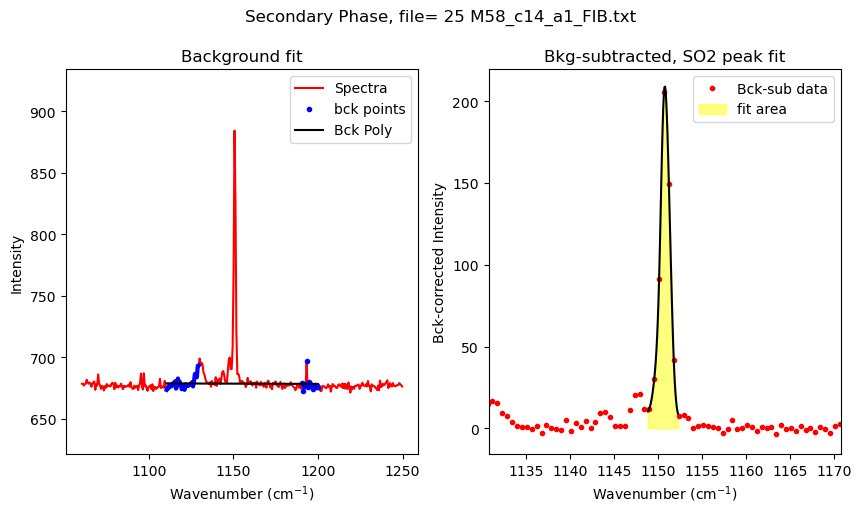

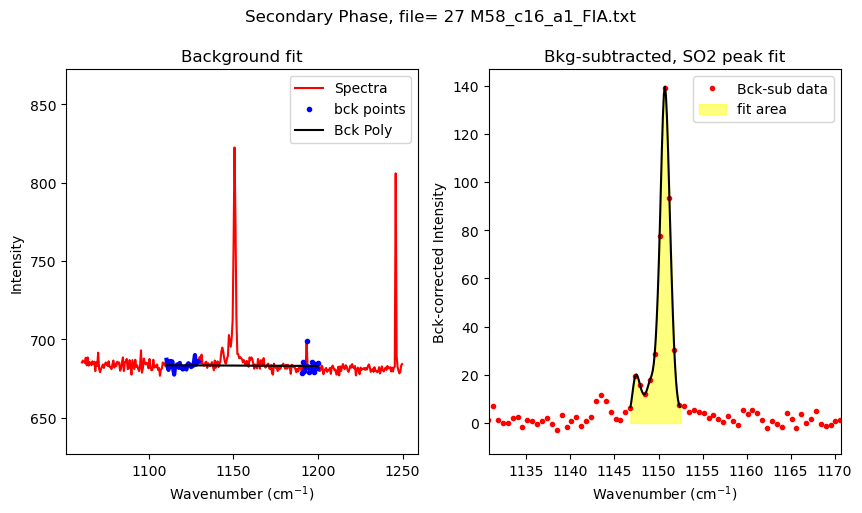

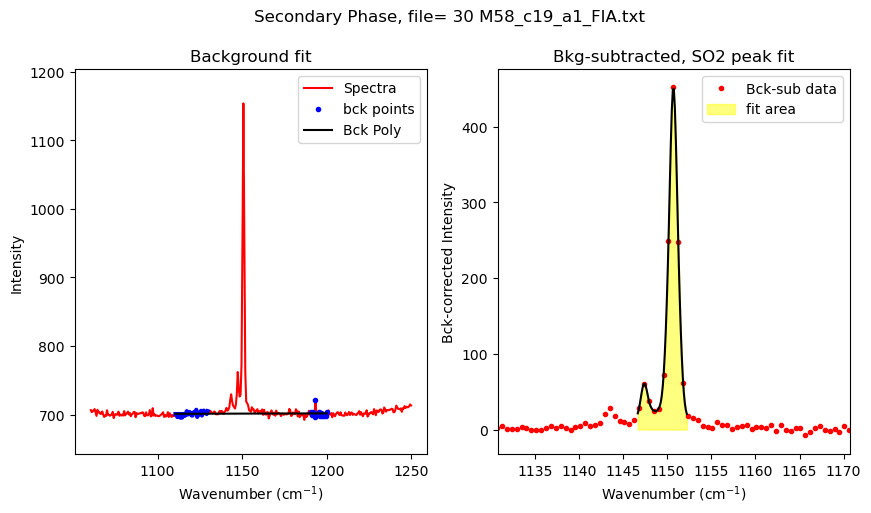

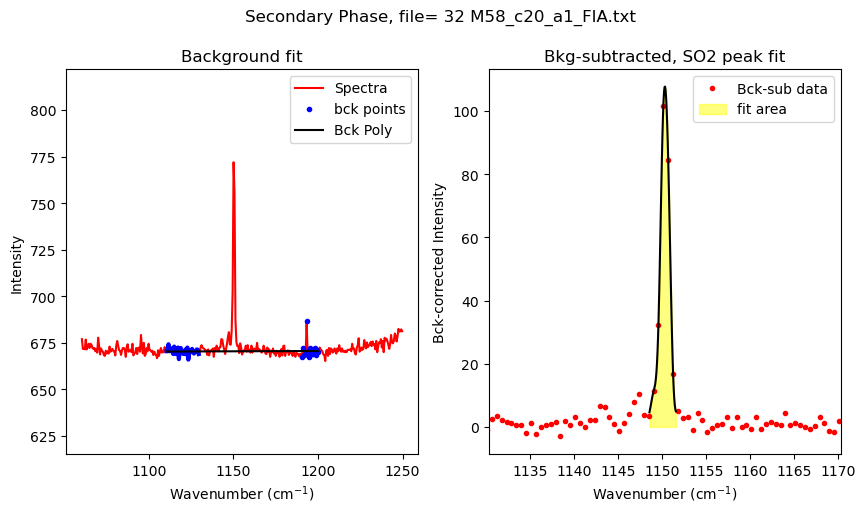

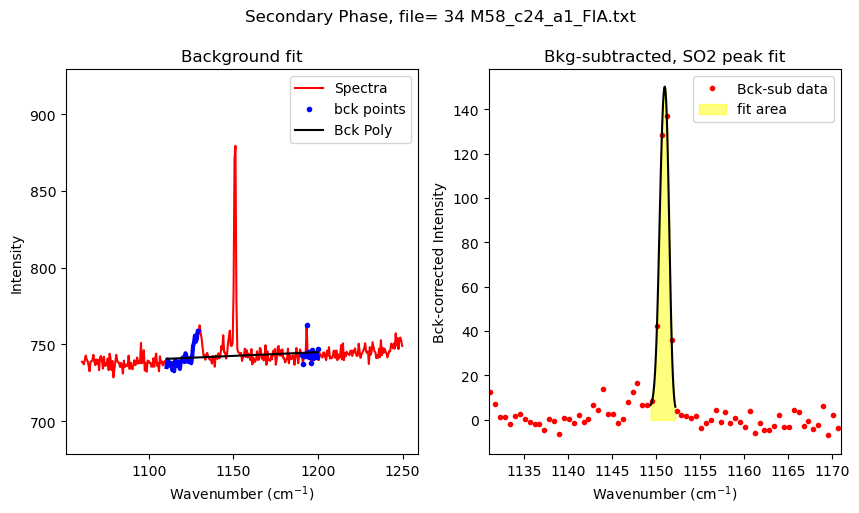

In [22]:
files_to_fit=filenames_SO2
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_SO2 = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    SO2_peak_fit=pf.fit_generic_peak(config=SO2_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_SO2 = pd.concat([df_Merge_SO2, SO2_peak_fit], axis=0)

In [23]:
df_Merge_SO2

,filename,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name
0,03 M58_c26_a1_FIA_crazySO2.txt,1149.030202,1112.401486,469.145256,Spline
0,05 M58_c25_a1_FIA.txt,1151.008207,67.116493,46.950902,Spline
0,10 M58_c3_a1_FIA.txt,1150.468751,868.874777,483.977756,Spline
0,14 M58_c7_a1_FIA.txt,1150.468751,925.798063,484.061645,Spline
0,15 M58_c9_a1_FIA.txt,1150.648570,253.186154,179.436467,Spline
0,18 M58_c11_a1_FIA.txt,1150.348872,789.813298,443.698952,Spline
0,19 M58_c12_a1_FIA.txt,1150.708510,304.269304,188.482533,Spline
0,21 M58_c13_a1_FIA.txt,1151.247966,172.246941,94.203448,Spline
0,23 M58_c13_a2_FIC.txt,1151.247966,98.780289,73.965457,Spline
0,25 M58_c14_a1_FIB.txt,1150.768449,295.125415,205.703794,Spline


### Plot peak areas and peak heights

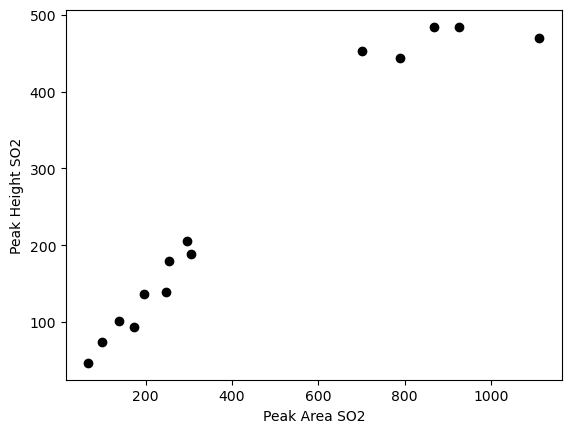

In [24]:
if sum(SO2_filter)>0:
    plt.plot(df_Merge_SO2['Peak_Area_SO2'], 
            df_Merge_SO2['Peak_Height_SO2'], 'ok')
    plt.xlabel('Peak Area SO2')
    plt.ylabel('Peak Height SO2')
    # plt.yscale('log')
# plt.xscale('log')

### Save this to excel

In [25]:
if sum(SO2_filter)>0:
    df_Merge_SO2.to_excel('SO2_Peak_fits.xlsx', index=False)

## Now do the same to ID any carbonate peaks

### Using scipy find peaks methods
- This method doesnt always work perfectly for broader carbonate peaks

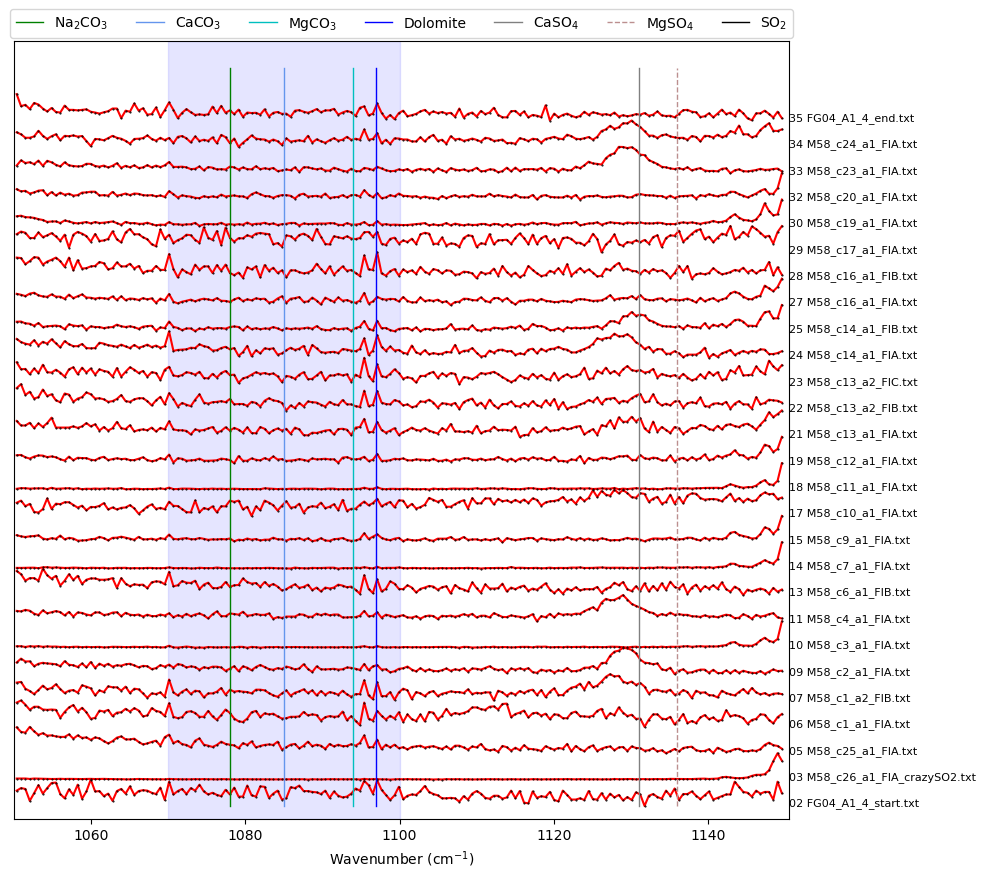

In [26]:

prominence_carb=30
height_carb=10
width_carb=1
threshold_carb=1

Carb_peaks_scipy, x_data_scipy, y_data_scipy, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=spectra_filetype, find_peaks_filter=True,  
xlim_plot=[1050, 1150], xlim_peaks=[1070, 1100], yscale=0.3,
prominence=prominence_carb, height=height_carb, width=width_carb, threshold=threshold_carb)
Carb_peaks=Carb_peaks_scipy

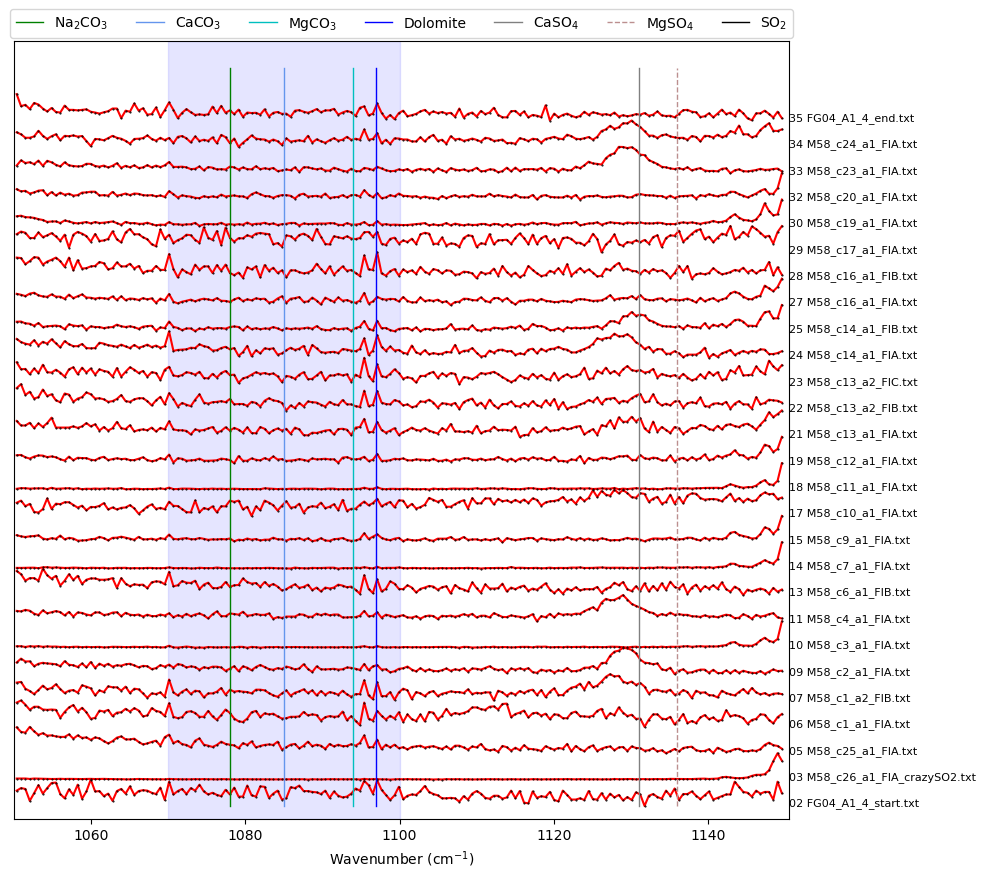

In [27]:

prominence_carb=30
height_carb=10
width_carb=1
threshold_carb=1

Carb_peaks_prom, x_data_prom, y_data_prom, fig=pf.plot_secondary_peaks(
Diad_Files=Diad_Files, path=spectra_path, 
 filetype=spectra_filetype, prominence_filter=True,  
xlim_plot=[1050, 1150], xlim_peaks=[1070, 1100], yscale=0.3,
prominence=prominence_carb, height=height_carb, width=width_carb, threshold=threshold_carb)

## Find ones with certain peak parameters to include

In [28]:
Carb_noNa=np.isnan(Carb_peaks['pos'])
prom_filter=30
Carb_filter=((Carb_peaks['prom']>prom_filter))&(~Carb_noNa)
print('Number kept with this filter:')
print(sum(Carb_filter))
print('Number discarded:')
print(sum(~Carb_filter&(~Carb_noNa)))
filenames_Carb=list(File_df['filename'].loc[Carb_filter])
print('filenames with carb:')
print(filenames_Carb)

Number kept with this filter:
0
Number discarded:
0
filenames with carb:
[]


### Fit one to tweak parameters

In [29]:
if sum(Carb_filter)>0:
    filename_carb=filenames_Carb[0]

    Carb_peak_config=pf.generic_peak_config(name='Carb', lower_bck=[1050, 1070],
    upper_bck=[1120, 1150], cent=1090, x_range_bck=50, N_poly_carb_bck=2, model_name='Spline')
    print(Carb_peak_config)

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
    path=spectra_path, filename=filename_carb, filetype=spectra_filetype,
     plot_figure=True)

### Loop over all carbonate files

In [30]:
files_to_fit=filenames_Carb
plot_figure=True # If False, Means doesnt have to make figures, lot faster. 
close_figure=False # Means shows figures in the notebook itself

df_Merge_Carb = pd.DataFrame([])

for i in tqdm(range(0, len(files_to_fit))): #
    
    ## Diad 1 fit
    filename=files_to_fit[i]

    Carb_peak_fit=pf.fit_generic_peak(config=Carb_peak_config, 
path=spectra_path, filename=filename, filetype=spectra_filetype,
 plot_figure=plot_figure)
 
    df_Merge_Carb = pd.concat([df_Merge_Carb, Carb_peak_fit], axis=0)

0it [00:00, ?it/s]


In [31]:
if sum(Carb_filter)>0:
    plt.plot(df_Merge_Carb['Peak_Area_Carb'], 
        df_Merge_Carb['Peak_Height_Carb'], 'ok')
    plt.xlabel('Peak Area Carb')
    plt.ylabel('Peak Height Carb')
# plt.yscale('log')
# plt.xscale('log')

## Save to excel

In [32]:
if sum(Carb_filter)>0:
    df_Merge_Carb.to_excel('Carb_Peak_fits.xlsx', index=False )

In [20]:
df_Merge_Carb

""
